# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [1]:
# Import the appropriate libraries with aliases
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Create two new dataframes
north_df = pd.read_csv("NorthCallCenter.csv")
south_df = pd.read_csv("SouthCallCenter.csv")

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, answer the following questions. In the code blocks below enter the code used to solve the question.  At the end of the section record your answers by double clicking where asked.

#### EDA Question 1A:  How many reps are in the North branch?  

In [2]:
#north_df.head()
south_df.head()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1


In [3]:
#Code Used:Get unique Rep ID to get number of reps in branch
north_df['Rep ID'].nunique()

9

#### EDA Question 1B:  How many reps are in the South branch?  

In [4]:
#Code Used:Get unique Rep ID to get number of reps in branch
south_df['Rep ID'].nunique()

11

#### EDA Question 2A:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the North branch? 

In [5]:
#Code Used:aggregate data and get mean value
north_df[['Busy Minutes','Not Ready Minutes','Incoming Wait Time','During Call Wait Time']].mean()

Busy Minutes             9.987755
Not Ready Minutes        1.914286
Incoming Wait Time       3.048780
During Call Wait Time    2.967347
dtype: float64

#### EDA Question 2B:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the South branch? 

In [6]:
#Code Used:aggregate data and get mean value
south_df[['Busy Minutes','Not Ready Minutes','Incoming Wait Time','During Call Wait Time']].mean()

Busy Minutes             10.054140
Not Ready Minutes         1.910828
Incoming Wait Time        3.000000
During Call Wait Time     3.076433
dtype: float64

#### EDA Question 3:  What is the number of calls taken for each time block(Both North and South combined)?

In [7]:
# Code Used: join both data set and sum all the calls
# time block is in text so 9:00 AM comes in end
both_df = pd.concat([north_df,south_df])
both_tb = both_df.groupby(['Time Block'])['Calls'].sum()
both_tb

Time Block
10:00 AM     99
11:00 AM     56
12:00 PM    120
1:00 PM      40
2:00 PM      65
3:00 PM      73
4:00 PM      53
5:00 PM      43
9:00 AM      10
Name: Calls, dtype: int64

##### Record your answers for the EDA section by double clicking here:
- 1a) Reps in the North Branch = 9
- 1b) Reps in the South Branch = 11


- 2a) North Branch, (round to the nearest hundredth):
> - Busy Minutes = 9.988
> - Not Ready Minutes = 1.914
> - Incoming Wait Time = 3.049
> - During Call Wait Time = 2.967
- 2b) South Branch, (round to the nearest hundredth):
> - Busy Minutes = 10.054
> - Not Ready Minutes = 1.911
> - Incoming Wait Time = 3.00
> - During Call Wait Time = 3.076
- 3) Total Calls taken for all branches per time block:
> - 9:00AM   = 10
> - 10:00AM  = 99
> - 11:00AM  = 56
> - 12:00PM  = 120
> - 1:00PM   = 40
> - 2:00PM   = 65
> - 3:00PM   = 73
> - 4:00PM   = 53
> - 5:00PM   = 43



<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Cleaning Your Data 
Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. 

#### Cleaning Question 1:  Is there any missing data and if yes explain what you would do with the missing data and why?
##### Record your answer by double clicking here:
> Your Answer: There is only missing values in column 'Incoming Wait Time' column which indicated there was no wait time but rest of the columns do not have any missing data

In [8]:
# Code Used
# Add Additional Cells as needed.
# Find missing data
north_df.isna().sum()

Unnamed: 0                 0
Branch                     0
Call Purpose               0
Time Block                 0
Incoming or Outgoing       0
Queue                      0
Rep ID                     0
Sale                       0
Lost Call                  0
Abandoned                  0
Busy Minutes               0
Not Ready Minutes          0
Incoming Wait Time       163
During Call Wait Time      0
Calls                      0
dtype: int64

In [9]:
south_df.isna().sum()

Unnamed: 0                 0
Branch                     0
Call Purpose               0
Time Block                 0
Incoming or Outgoing       0
Queue                      0
Rep ID                     0
Sale                       0
Lost Call                  0
Abandoned                  0
Busy Minutes               0
Not Ready Minutes          0
Incoming Wait Time       188
During Call Wait Time      0
Calls                      0
dtype: int64

YES has a blank space in end, replace 'YES ' with 'YES'#### Cleaning Question 2:  In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
##### Record your answer by double clicking here:
> Your Answer: YES has a blank space in end, Stripping all white spaces from value

In [10]:
#Check number of vales in Sale column
north_df['Sale'].nunique()

3

In [11]:
#Code Used : YES has a blank space in end, strip() all blank spaces
# Add Additional Cells as needed.
north_df['Sale']= north_df['Sale'].str.strip()

In [12]:
#confirm 
north_df['Sale'].nunique()

2

#### Cleaning Question 3:  Are there duplicates in the two data sets? If there are, how did you handle them?
##### Record your answer by double clicking here:
> Your Answer: We can check duplicates by df.duplicated() if there are any we can drop them by drop_duplicates(). In our both dataframes there were no duplicates

In [13]:
north_df.shape

(245, 15)

In [14]:
#Check duplicates in North data set
duplicate_north_df = north_df[north_df.duplicated()]
duplicate_north_df.shape

(0, 15)

In [15]:
drop_north_dups = north_df.drop_duplicates()

In [16]:
drop_north_dups.shape

(245, 15)

In [17]:
south_df.shape

(314, 15)

In [18]:
#Check duplicates in South data set
duplicate_south_df = south_df[south_df.duplicated()]
duplicate_south_df.shape

(0, 15)

In [19]:
drop_south_dups = south_df.drop_duplicates()

In [20]:
drop_south_dups.shape

(314, 15)

#### Cleaning Question 4:  Is any of the data in the two data sets unnecessary? If yes, how did you handle it?
##### Record your answer by double clicking here:
> Your Answer: 

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Data Manipulation
Before you begin answering any questions, combine the two datasets together to create a third dataframe called df. You can use this third dataframe to compare the two call centers to company-wide trends.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. Record your answer by double clicking the below cell.

In [21]:
# Create dataframe for the entire company named df
df = pd.concat([north_df,south_df])
df

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,309,South,Product Support,5:00 PM,Outgoing,D,Helga,NO,0,0,10,3,NaN,4,1
310,310,South,Product Support,5:00 PM,Outgoing,C,Susan,NO,0,0,12,3,NaN,4,1
311,311,South,Product Support,5:00 PM,Outgoing,C,Sandy,NO,0,0,9,3,NaN,4,1
312,312,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,0,10,1,NaN,2,1


#### Manipulation Question 1:  Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

##### Record your answer by double clicking here:
Rep with the hightest number of calls and their total calls:
- North Branch = Brent 37 calls
- South Branch = Eric 35 calls


In [22]:
# Code Used
# Add Additional Cells as needed.
gp_branch_rep = df[['Calls','Rep ID','Branch']].groupby(['Branch','Rep ID']).agg('sum')

In [23]:
gp_branch_rep.sort_values(by='Calls',ascending=False)

Calls
Branch Rep ID       
North  Brent      37
South  Eric       35
       Randy      33
       Sandy      32
       Helga      31
North  Lilly      30
       Duke       29
       Todd       29
South  Kate       29
       George     29
       Karl       28
       Josh       26
       Susan      26
North  Joe        26
South  Sharon     25
North  Xander     24
       Cam        24
       Andy       23
       Amanda     23
South  Alice      20

#### Manipulation Question 2:  The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
##### Record your answer by double clicking here:
Average Call Abandonment Rates (round to the nearest hundredth):
- North Branch = 2.857
- South Branch = 1.274
- Company Wide = 1.968
- Do any of these fall out of the optimal range of 2-5%? Yes

In [27]:
# Code Used
# Add Additional Cells as needed.
avg_aband_calls = (df[['Abandoned','Branch']].groupby('Branch').agg('mean'))*100
avg_aband_calls

,Abandoned
Branch,
North,2.857143
South,1.273885


In [28]:
avg_aband_calls_whole = (df[['Abandoned']].agg('mean'))*100
avg_aband_calls_whole

Abandoned    1.9678
dtype: float64

### Manipulation Question 3:  Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?
##### Record your answer by double clicking here:
Percentage of calls answered within 2 seconds, include # of calls:
- North Branch = 40.24% ; 33
- South Branch = 38.10% ; 48
- Company Wide = 38.94% ; 81

In [75]:
# Code Used
# Add Additional Cells as needed.
def call_in_2min (series):
    if series <= 2:
        return 1
    else:
        0 
    
df['In 2 min'] = (df['Incoming Wait Time'].apply(call_in_2min))
incoming_calls = df.groupby('Incoming or Outgoing')['Calls'].count()['Incoming']


comb_calls_in_2min = (df['In 2 min'].agg('count')/incoming_calls)*100

print('% of calls answered in 2min: ',comb_calls_in_2min,'\nNo of calls in 2min: ',df['In 2 min'].agg('count'))

% of calls answered in 2min:  38.94230769230769 
No of calls in 2min:  81


In [78]:
by_branch_calls = ((df.groupby('Branch')['In 2 min'].agg('count'))/(df.groupby(['Branch','Incoming or Outgoing'])['Calls'].agg('count')))*100
#print(by_branch_calls,(df.groupby(['Branch','Incoming or Outgoing'])['In 2 min'].agg('count')))
print('% of calls answered in 2min: ',by_branch_calls,'\nNo of calls in 2min: ',(df.groupby('Branch')['In 2 min'].agg('count')))

% of calls answered in 2min:  Branch  Incoming or Outgoing
North   Incoming                40.243902
        Outgoing                20.245399
South   Incoming                38.095238
        Outgoing                25.531915
dtype: float64 
No of calls in 2min:  Branch
North    33
South    48
Name: In 2 min, dtype: int64


## Manipulation Question 4: For each branch and the entire company, what is the average speed of answer?
##### Record your answer by double clicking here:
Average speed of answer (rounded to nearest hundredth):
- North Branch in seconds = 182.927 sec
- South Branch in seconds = 180.000 sec
- Company Wide in seconds = 181.154 sec


In [31]:
# Code Used 
# create a column ro capture total time customer had to wait before call is answered. 
# which is equal to total of Not Ready minutes, Incoming wait time and during call wait time.

df['Total Wait Time'] = df['Incoming Wait Time']
co_avg_wait_time = df['Total Wait Time'].agg('mean')*60
df['Incoming Wait Time'].mean()*60

181.15384615384616

In [32]:
by_branch_wait_time = (df.groupby('Branch')['Total Wait Time'].agg('mean'))*60
by_branch_wait_time

Branch
North    182.926829
South    180.000000
Name: Total Wait Time, dtype: float64

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why. 

*NOTE Some questions you may decide to use more than one chart and or chart style.

#### Visualization 1:  What is the average abandonment rate per queue?
##### Record your answer by double clicking here:

> Chart style you chose and why: Bar chart, as it clearly depict the comparison

In [33]:
# Create visualization 1 here
# Import any additional libraries needed with alias

import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import style

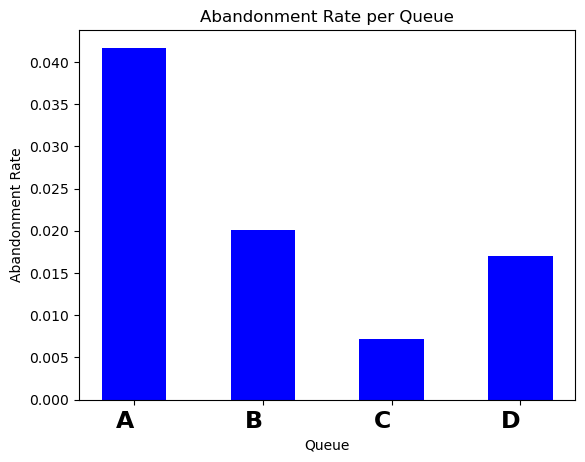

In [34]:
# The dictionary abandonment_rates has the data you need.
abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] 


#Your Code Here:
plt.bar(np.arange(len(queues)), abandonment_rates.values(),color='blue', width=.5)
plt.title('Abandonment Rate per Queue', color = 'Black')
plt.xlabel('Queue',color = 'black')
plt.ylabel('Abandonment Rate',color = 'black')
plt.xticks(np.arange(len(queues)), queues ,color='black', rotation = 0, fontweight='bold', fontsize='17', horizontalalignment='right')
plt.show()




#### Visualization 2: What is the service level percentage and average speed of answer for each rep in the North Branch?
##### Record your answer by double clicking here:

> Chart style you chose and why: Pie chart. Its easy to corelate data in percentages

<AxesSubplot:title={'center':'The service level % and Rep in the North Branch'}, xlabel='Rep ID', ylabel='Service Level %'>

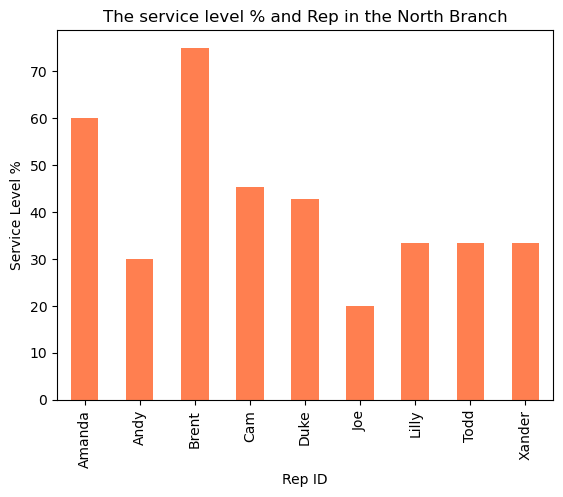

In [35]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep

north_plt = north_df.groupby("Rep ID")["Incoming Wait Time"].mean()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = north_df[north_df["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = north_df[north_df["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100

#Your Code Here:
service_level["Service Level %"].plot(kind='bar', title="The service level % and Rep in the North Branch", color ='coral', ylabel = "Service Level %", xlabel="Rep ID")


<AxesSubplot:title={'center':'The average speed of answer and Rep in the North Branch'}, xlabel='Rep ID', ylabel='Average Speed of Answer'>

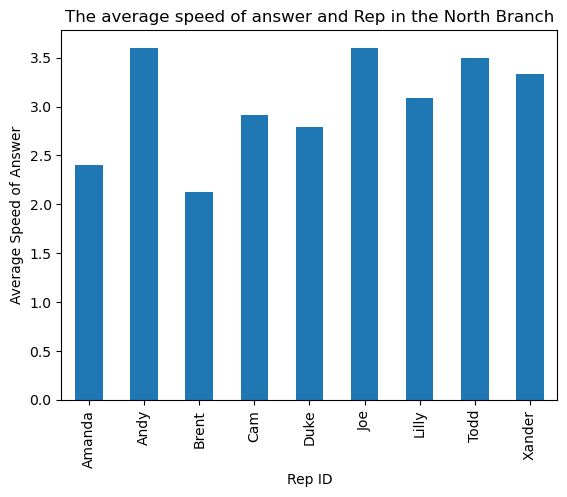

In [36]:
north_plt.plot(kind="bar", title="The average speed of answer and Rep in the North Branch" , ylabel='Average Speed of Answer', xlabel = 'Rep ID')

#### Visualization 3: For each type of call purpose, how many calls are outgoing vs. incoming?
##### Record your answer by double clicking here:

> Chart style you chose and why: 

Incoming or Outgoing  Call Purpose   
Incoming              Product Support     82
                      Sales Support       75
                      Complaint           51
Outgoing              Product Support    228
                      Sales Support      123
Name: Call Purpose, dtype: int64


<AxesSubplot:title={'center':'Type of Call Purpose & Outgoing Vs Incoming calls'}, xlabel='Purpose', ylabel='Number of calls'>

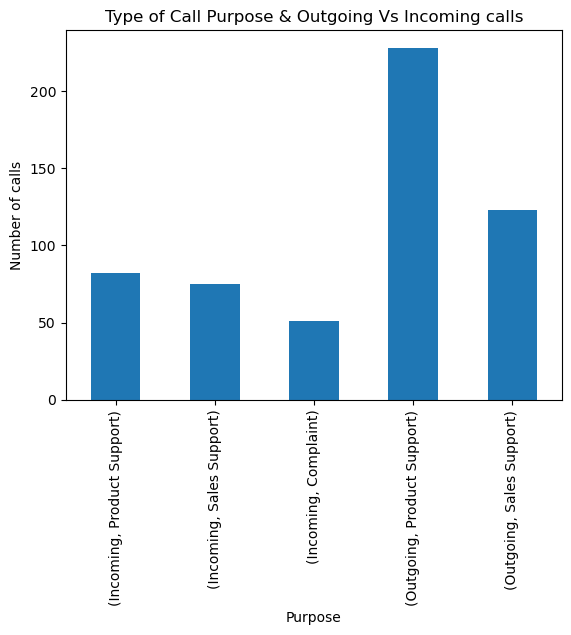

In [49]:
# Create visualization 3 here:
# The three dictionaries, complaints, sales_support, and product_support, have the information you need

purpose_group = df.groupby("Incoming or Outgoing")
call_purpose = ["Complaint", "Product Support", "Sales Support"]
purpose_counts = purpose_group["Call Purpose"].value_counts()
print(purpose_counts)

# complaints = purpose_counts["Complaint"].to_dict()
# sales_support = purpose_counts["Sales Support"].to_dict()
# product_support = purpose_counts["Product Support"].to_dict()

#Your Code Here:
purpose_counts.plot(kind='bar',title="Type of Call Purpose & Outgoing Vs Incoming calls" , ylabel='Number of calls', xlabel = 'Purpose')

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.


#### Summary Question 1:  Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?

##### Record your answer by double clicking here:
> Your Answer: South branch is operating more efficiently with less abandant calls



#### Summary Question 2: Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?

##### Record your answer by double clicking here:
> Your Answer: North branch has less reps so they are not able to take all the calls


#### Summary Question 3: Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

##### Record your answer by double clicking here:
> Your Answer: I will like to get more information of reason of outgoing call, and length of the call


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Bonus Mission
Create a visualization that answers this question: For each call purpose, how many calls (incoming and outgoing) take place in each time block?
##### Record your answer by double clicking here:

> Chart style you chose and why: 

In [ ]:
# Create your Bonus Mission visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Use groupby to plot based on time blocks:

# Use groupby and get_group to select which call purpose to plot: